<a href="https://colab.research.google.com/github/DEBASISH-BIRMIWAL/NeuralNetworks/blob/main/Coral_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debasishbirmiwal","key":"81ee9a21f254801bc0263dc7a918a051"}'}

In [2]:
!pip install git+https://github.com/cleanlab/cleanvision.git
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import shutil
import cv2
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from cleanvision.imagelab import Imagelab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cleanlab/cleanvision.git to /tmp/pip-req-build-g83026xo
  Running command git clone --filter=blob:none --quiet https://github.com/cleanlab/cleanvision.git /tmp/pip-req-build-g83026xo
  Resolved https://github.com/cleanlab/cleanvision.git to commit 2bacee81e72583cffccdb405fbb5a74e560b6c88
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 72 Jun 23 15:50 kaggle.json


In [4]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          35815        992  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           5267        143  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           7145        150  1.0              
mohithsairamreddy/salary-data 

In [7]:
!kaggle datasets download -d vencerlanz09/healthy-and-bleached-corals-image-classification

 74% 19.0M/25.8M [00:00<00:00, 50.6MB/s]
100% 25.8M/25.8M [00:00<00:00, 58.6MB/s]


In [8]:
!unzip healthy-and-bleached-corals-image-classification.zip -d healthy-and-bleached-corals-image-classification

Archive:  healthy-and-bleached-corals-image-classification.zip
  inflating: healthy-and-bleached-corals-image-classification/bleached_corals/10033870215_3664757d59_o.jpg  
  inflating: healthy-and-bleached-corals-image-classification/bleached_corals/10160888014_be7c71167c_o.jpg  
  inflating: healthy-and-bleached-corals-image-classification/bleached_corals/10309615296_7805d8534c_b.jpg  
  inflating: healthy-and-bleached-corals-image-classification/bleached_corals/10415679866_6eea4769f6_o.jpg  
  inflating: healthy-and-bleached-corals-image-classification/bleached_corals/11023816893_9994f554e2_o.jpg  
  inflating: healthy-and-bleached-corals-image-classification/bleached_corals/11263772193_b910d0037b_o.jpg  
  inflating: healthy-and-bleached-corals-image-classification/bleached_corals/11333883796_e74aa9bd17_o.jpg  
  inflating: healthy-and-bleached-corals-image-classification/bleached_corals/11531111734_db61a343f5_o.jpg  
  inflating: healthy-and-bleached-corals-image-classification/ble

In [9]:
sdir='/content/healthy-and-bleached-corals-image-classification'

In [10]:
slength=len(sdir)
imagelab = Imagelab(sdir)
imagelab.find_issues()

Reading images from /content/healthy-and-bleached-corals-image-classification
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/923 [00:00<?, ?it/s]

  0%|          | 0/923 [00:00<?, ?it/s]

Issue checks completed. 47 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


In [11]:
print(imagelab.issue_summary)

         issue_type  num_images
0  exact_duplicates          36
1   near_duplicates           8
2            blurry           2
3              dark           1
4         grayscale           0
5             light           0
6   low_information           0
7  odd_aspect_ratio           0
8          odd_size           0


In [28]:
dup_count=0
plist=[]
for i, ed in enumerate(exact_duplicates):
  lengthp=len(ed)
  for j in range(1, lengthp):
    plist.append([ed[0], ed[j]])
    dup_count += 1

In [26]:
paths=list(imagelab.info['exact_duplicates']['sets'])
count=len(paths)


AttributeError: ignored

In [33]:
def resize_img(img):
    img_height=150
    img_width=int((img_height/img.shape[0])* img.shape[1])
    img=cv2.resize(img, (img_width, img_height))
    return img

def show_dups(dups, length, sdir):
    height=int ((length +1)*4)
    plt.figure(figsize=(15, height))# width, height
    for i in range(length):
        f1path=dups[i][0]
        f2path=dups[i][1]
        img1=cv2.imread(f1path)
        img1=resize_img(img1)
        img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2=cv2.imread(f2path)
        img2=resize_img(img2)
        img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        j= i*2
        plt.subplot(length,2,j+1)
        title=f1path.replace(sdir, '')
        plt.title(title, color='blue', fontsize=14)
        plt.axis('off')
        plt.imshow(img1)
        plt.subplot(length,2,j+2)
        title=f2path.replace(sdir, '')
        plt.title(title,color='blue', fontsize=14)
        plt.axis('off')
        plt.imshow(img2)
    plt.show()

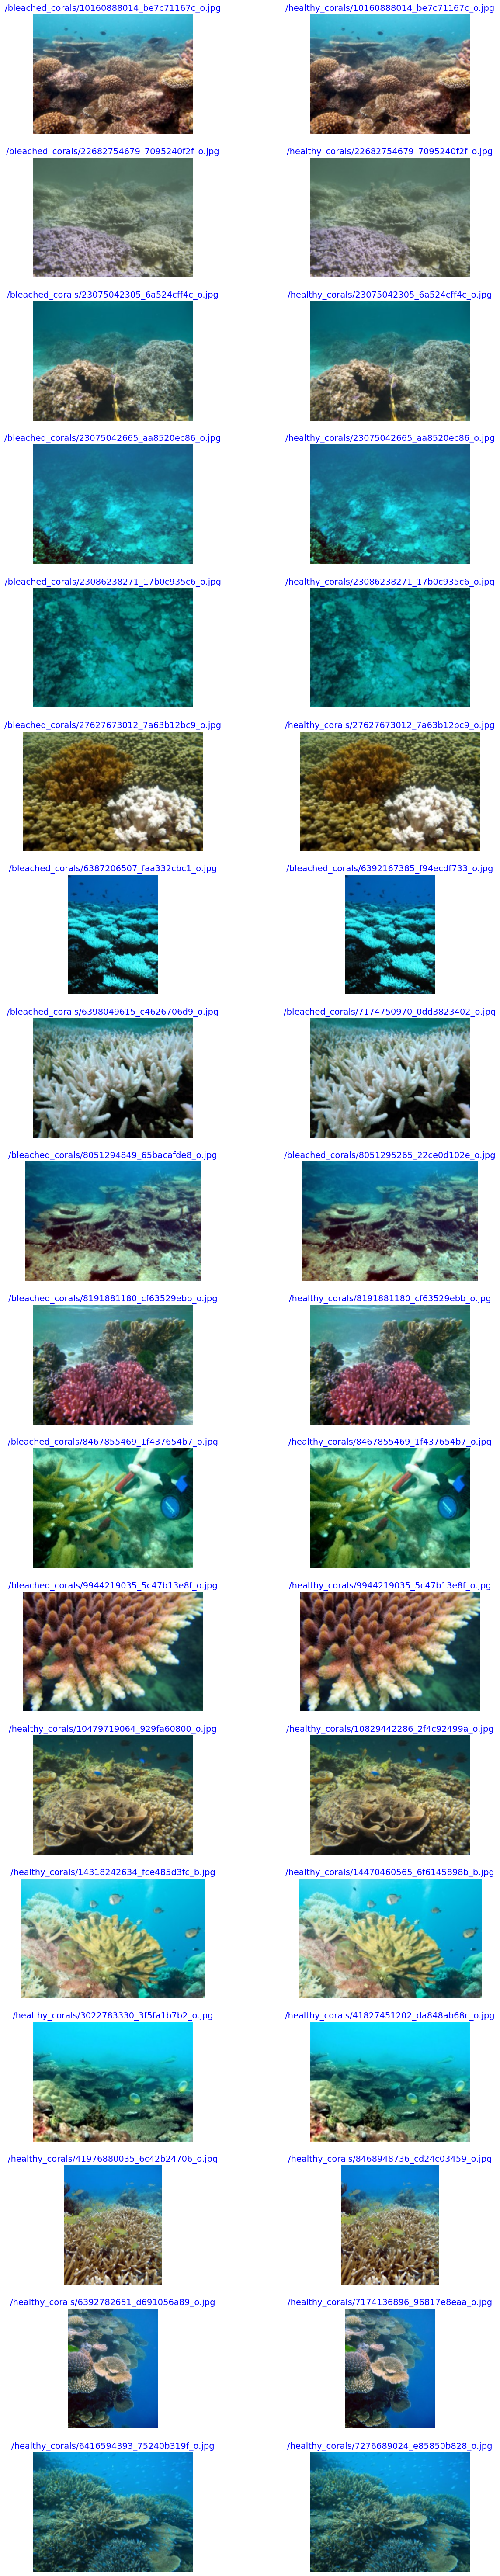

In [34]:
show_dups(plist, dup_count, sdir)

             Original Image                         exact duplicate             


NameError: ignored